# Direct Methods for the solution of Linear Systems

In [1]:
import numpy as np
import scipy
import matplotlib.pyplot as plt

In [2]:
def solveSystem(A):
    x_true = np.ones((A.shape[0],))

    b = A @ x_true

    x_sol = np.linalg.solve(A, b)
    error_abs = np.linalg.norm(x_true - x_sol, 2)
    error_rel = error_abs / np.linalg.norm(x_true, 2)
    
    return x_sol, error_abs, error_rel

In [3]:
def evaluate(matrixes):
    errors = []
    conds_2 = []
    conds_inf = []


    for A in matrixes:
        norm_2 = np.linalg.cond(A, 2)
        norm_inf = np.linalg.cond(A, np.inf)
        _, _, error_rel = solveSystem(A)

        print(f"{A.shape}".ljust(12) + 
              f"2-norm K(A): {norm_2}".ljust(40) + 
              f"| inf-norm K(A): {norm_inf}".ljust(40) + 
              f"| rel error: {error_rel}")

        errors.append(error_rel)
        conds_2.append(norm_2)
        conds_inf.append(norm_inf)


    n_values = [A.shape[0] for A in matrixes]

    # plt.figure(figsize=(5, 4))
    # plt.title("Relative error w.r.t. n")
    # plt.plot(n_values, errors)
    # plt.xlabel("n")
    # plt.ylabel("Relative error")

    plt.figure(figsize=(20, 5))
    plt.suptitle("Relative error w.r.t. n")
    plt.subplot(1, 2, 1)
    plt.title("Linear scale")
    plt.plot(n_values, errors)
    plt.xlabel("n")
    plt.xticks(n_values)
    plt.ylabel("Relative error")
    plt.subplot(1, 2, 2)
    plt.title("Log scale")
    plt.plot(n_values, errors)
    plt.xlabel("n")
    plt.xticks(n_values)
    plt.ylabel("Relative error")
    plt.yscale("log")
    plt.show()

    plt.figure(figsize=(20, 5))
    plt.suptitle("Condition number w.r.t. n")
    plt.subplot(1, 2, 1)
    plt.title("Linear scale")
    plt.plot(n_values, conds_2, label="2-norm")
    plt.plot(n_values, conds_inf, label="inf-norm")
    plt.xlabel("n")
    plt.xticks(n_values)
    plt.ylabel("K(A)")
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.title("Log scale")
    plt.plot(n_values, conds_2, label="2-norm")
    plt.plot(n_values, conds_inf, label="inf-norm")
    plt.xlabel("n")
    plt.xticks(n_values)
    plt.ylabel("K(A)")
    plt.yscale("log")
    plt.legend()
    plt.show()

## 1. Random matrix

(10, 10)    2-norm K(A): 88.71631556667255          | inf-norm K(A): 182.83466374677644     | rel error: 6.7876315497554736e-15
(20, 20)    2-norm K(A): 113.05995757605058         | inf-norm K(A): 339.89039140920926     | rel error: 2.3975419806993827e-15
(30, 30)    2-norm K(A): 4088.706655882238          | inf-norm K(A): 9849.106211934046      | rel error: 1.194027701115059e-13
(40, 40)    2-norm K(A): 21659.686698203306         | inf-norm K(A): 49435.046638907545     | rel error: 4.622110138328471e-13
(50, 50)    2-norm K(A): 269.2222080216966          | inf-norm K(A): 671.7827887185113      | rel error: 1.1305636065243315e-14
(60, 60)    2-norm K(A): 1475.0518112688817         | inf-norm K(A): 3589.658197187023      | rel error: 2.2049105668963544e-14
(70, 70)    2-norm K(A): 2838.4731510085917         | inf-norm K(A): 6498.986278362849      | rel error: 2.372627017171785e-14
(80, 80)    2-norm K(A): 1178.7264896931747         | inf-norm K(A): 3165.578404004379      | rel error: 2.

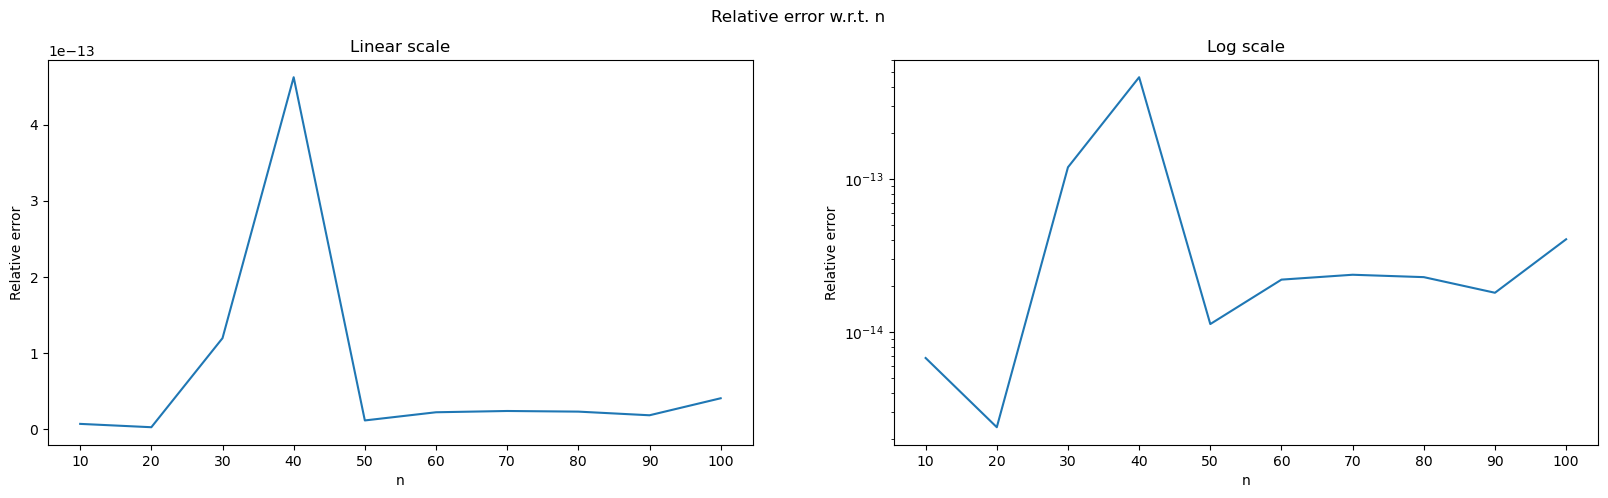

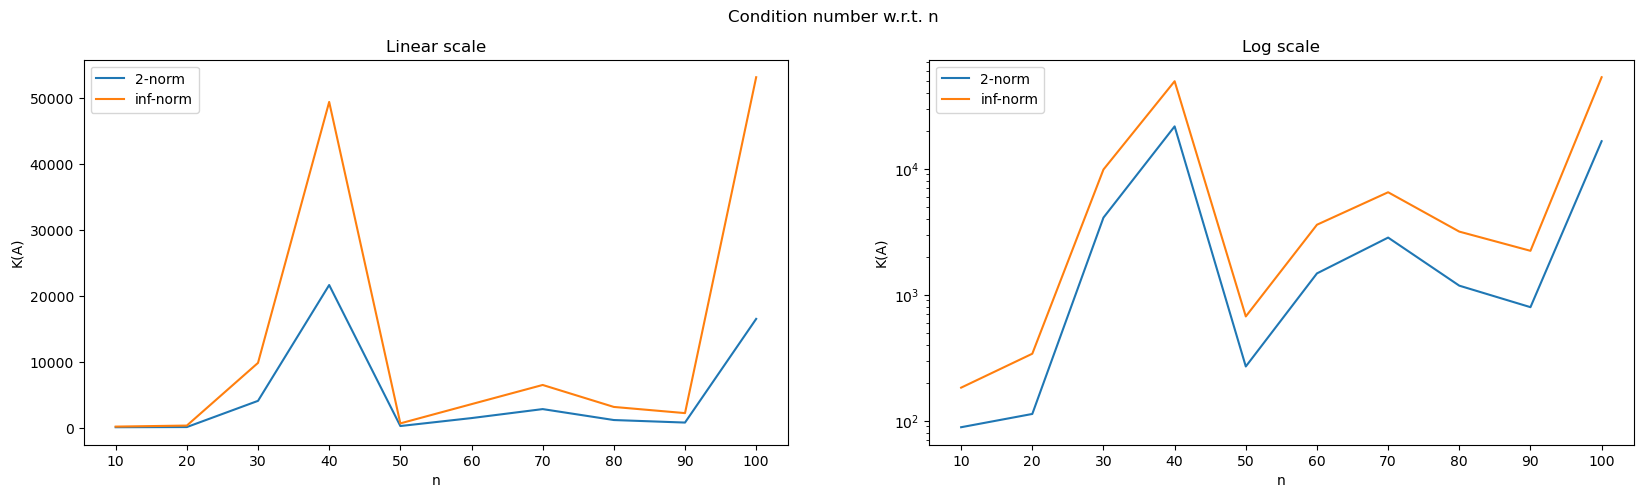

In [4]:
evaluate([np.random.rand(n, n) for n in range(10, 101, 10)])

## 2. Vandermonde matrix

(5, 5)      2-norm K(A): 26169.687970634335         | inf-norm K(A): 43736.00000000071      | rel error: 1.6425542348858826e-13
(10, 10)    2-norm K(A): 2106257537032.5671         | inf-norm K(A): 3306440916693.8804     | rel error: 2.8718888689864754e-07
(15, 15)    2-norm K(A): 2.582411131431374e+21      | inf-norm K(A): 4.364078834213286e+21  | rel error: 172.34434569011478
(20, 20)    2-norm K(A): 4.60886960592326e+23       | inf-norm K(A): 1.112151807957547e+24  | rel error: 279211.4807086357
(25, 25)    2-norm K(A): 2.035778315183818e+22      | inf-norm K(A): 6.351061393069339e+22  | rel error: 57898.48291003522
(30, 30)    2-norm K(A): 5.09896921255931e+21       | inf-norm K(A): 2.4729336568414145e+22 | rel error: 19592.445850592754


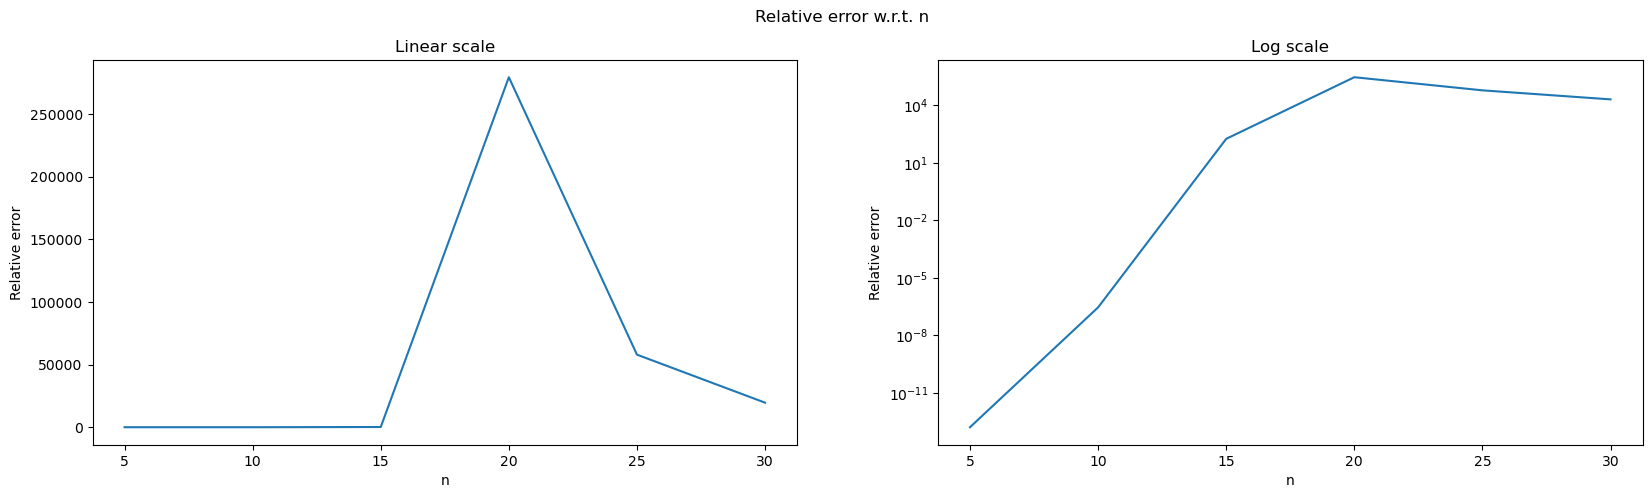

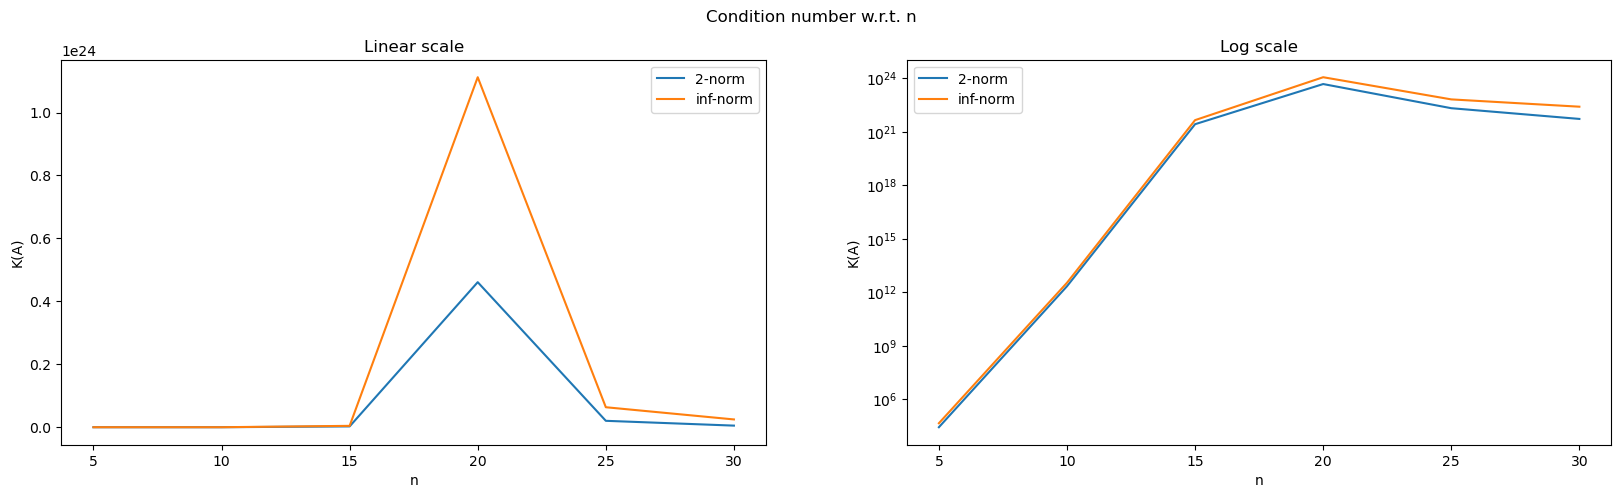

In [5]:
evaluate([np.vander(range(1, n+1, 1), n) for n in range(5, 31, 5)])

## 3. Hilbert matrix

(4, 4)      2-norm K(A): 15513.738738928138         | inf-norm K(A): 28374.999999997388     | rel error: 3.861787750251888e-13
(5, 5)      2-norm K(A): 476607.25024172297         | inf-norm K(A): 943655.9999999335      | rel error: 3.782942176591251e-12
(6, 6)      2-norm K(A): 14951058.64080515          | inf-norm K(A): 29070279.002940644     | rel error: 4.764069035605587e-10
(7, 7)      2-norm K(A): 475367356.91592133         | inf-norm K(A): 985194889.719848       | rel error: 3.6914292198943105e-09
(8, 8)      2-norm K(A): 15257575252.823627         | inf-norm K(A): 33872790819.49471      | rel error: 2.685641344606372e-07
(9, 9)      2-norm K(A): 493154382668.9694          | inf-norm K(A): 1099650991701.052      | rel error: 1.8137285075715115e-05
(10, 10)    2-norm K(A): 16024573626355.164         | inf-norm K(A): 35353724553756.43      | rel error: 0.0002596222657991884
(11, 11)    2-norm K(A): 522741900236946.1          | inf-norm K(A): 1230369938308719.0     | rel error: 6.15

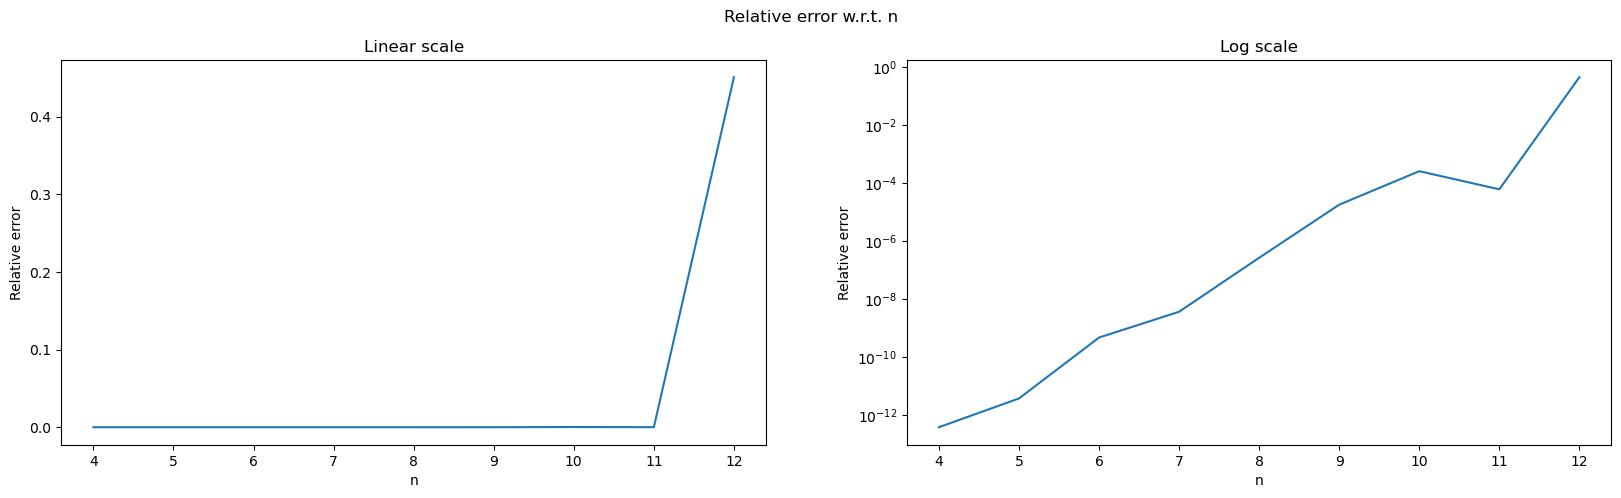

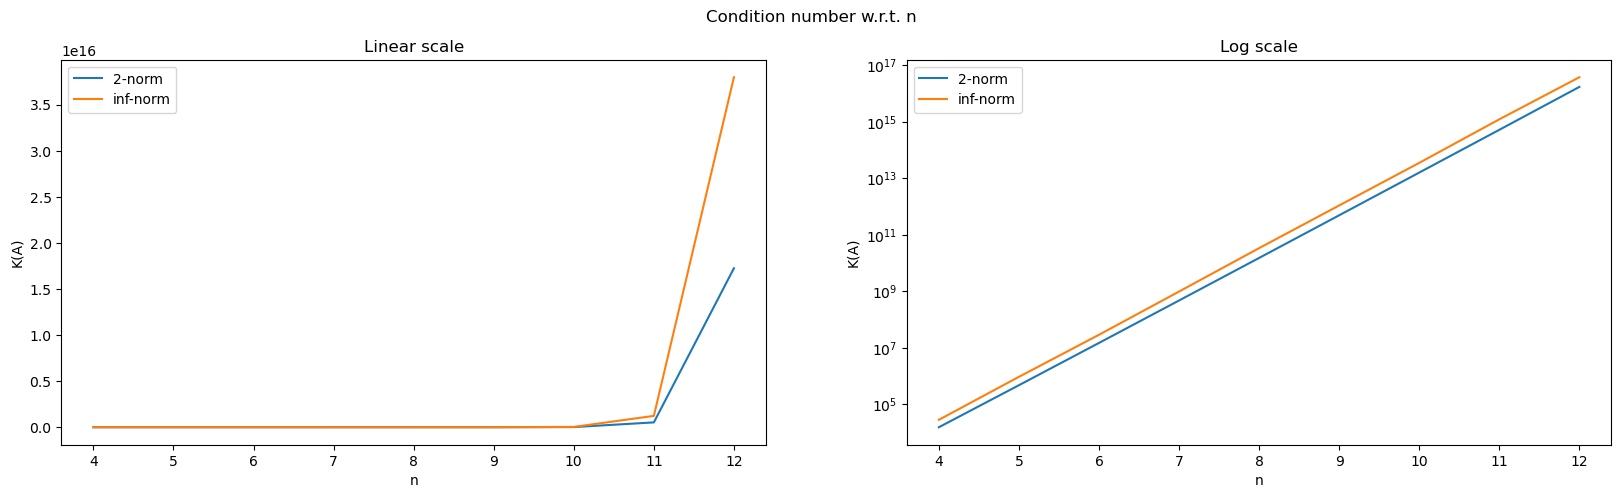

In [6]:
evaluate([scipy.linalg.hilbert(n) for n in range(4, 13, 1)])